(array([7.9000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.4000e+01, 0.0000e+00,
        6.7000e+01, 0.0000e+00, 0.0000e+00, 6.3000e+01, 0.0000e+00,
        7.0000e+01, 9.7000e+01, 0.0000e+00, 6.9000e+01, 1.4500e+02,
        1.0400e+02, 1.7100e+02, 0.0000e+00, 3.0600e+02, 0.0000e+00,
        3.8000e+02, 2.6800e+02, 2.4000e+02, 2.5400e+02, 5.9300e+02,
        2.3700e+02, 2.9700e+02, 5.1900e+02, 3.7100e+02, 6.7800e+02,
        2.0100e+02, 8.9500e+02, 6.4500e+02, 8.4900e+02, 3.0100e+02,
        6.1000e+02, 1.2320e+03, 3.1600e+02, 1.0010e+03, 3.0600e+02,
        9.4700e+02, 6.4500e+02, 6.6600e+02, 6.3700e+02, 7.5700e+02,
        9.0100e+02, 6.6400e+02, 7.5500e+02, 5.5800e+02, 7.3200e+02,
        6.3800e+02, 9.7100e+02, 4.1600e+02, 8.2400e+02, 6.5400e+02,
        7.0900e+02, 9.8800e+02, 7.3300e+02, 6.9800e+02, 7.7700e+02,
        1.0780e+03, 5.1900e+02, 9.8900e+02, 8.2000e+02, 8.3100e+02,
        1.3120e+03, 6.1500e+02, 1.7630e+03, 7.92

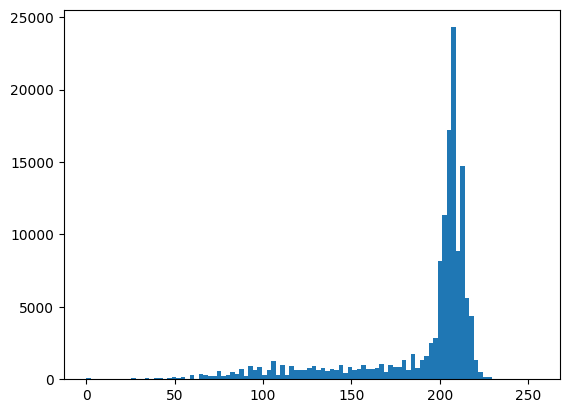

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/grains2.png", 0)

pixels_to_um = 0.5
plt.hist(img.flat, bins=100, range=(0,255))

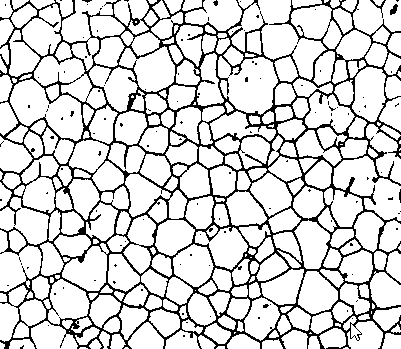

In [4]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(thresh)

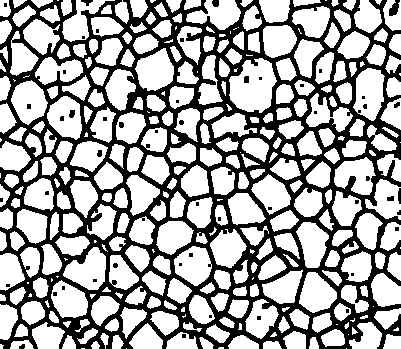

In [5]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
eroded = cv2.erode(thresh,kernel,iterations = 1)

cv2_imshow(eroded)

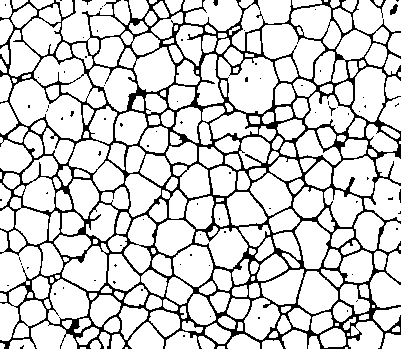

In [7]:
dilated = cv2.dilate(eroded,kernel,iterations = 1)
cv2_imshow(dilated)

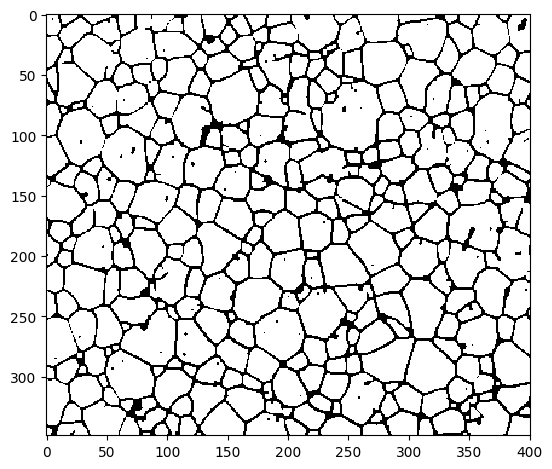

In [9]:
mask = dilated == 255
io.imshow(mask)

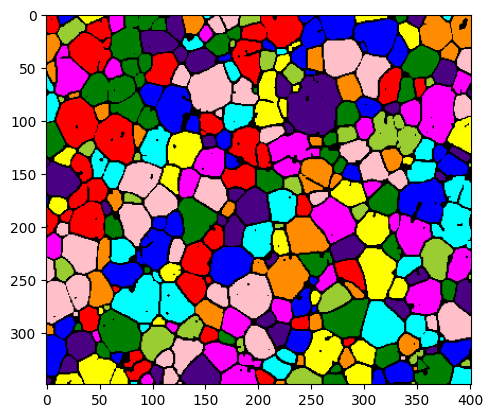

In [12]:
mask = dilated == 255
s = [[1,1,1],[1,1,1],[1,1,1]]
labeled_mask, num_labels = ndimage.label(mask, structure=s)
img2 = color.label2rgb(labeled_mask, bg_label=0)
plt.imshow(img2)